In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
path = "/Users/charlottemyers/projects/jlab/photoelectric/data/577.0_trial1.csv"

df = pd.read_csv(path, sep=",")
print(df.columns.tolist())

V = df["V"].to_numpy()
I = df["I"].to_numpy()


FileNotFoundError: [Errno 2] No such file or directory: '/Users/charlottemyers/projects/jlab/photoelectric/data/577.0_trial1.csv'

Text(0, 0.5, 'Current (I)')

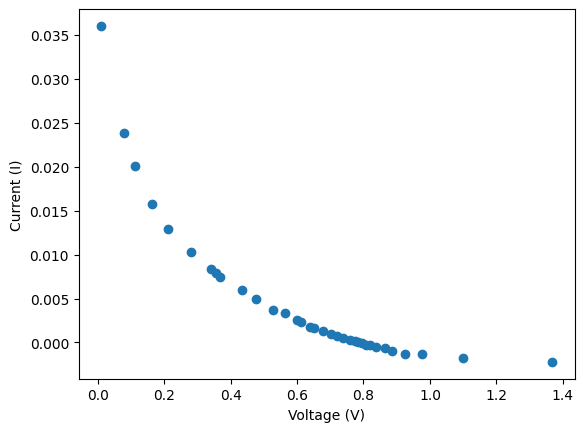

In [13]:
# plot V vs I

plt.plot(V, I, marker="o", linestyle="none")
plt.xlabel("Voltage (V)")
plt.ylabel("Current (I)")

x-intercept: 0.8203925451640897


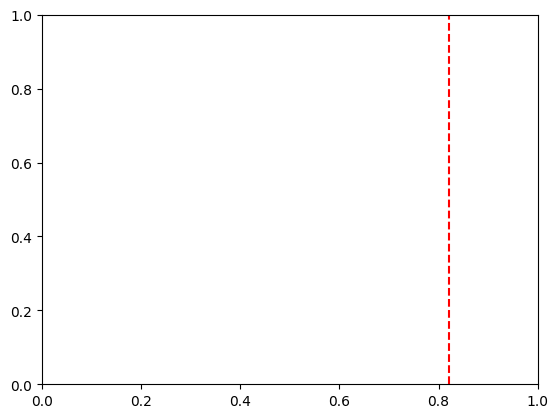

In [14]:
# determine 0 point crossing of I (x-intercept of I-V curve)
coeffs = np.polyfit(V, I, 1)
poly = np.poly1d(coeffs)
x_interp = -coeffs[1] / coeffs[0]
print(f"x-intercept: {x_interp}")
plt.axvline(x=x_interp, color="red", linestyle="--", label=f"x-intercept: {x_interp:.2f} V")


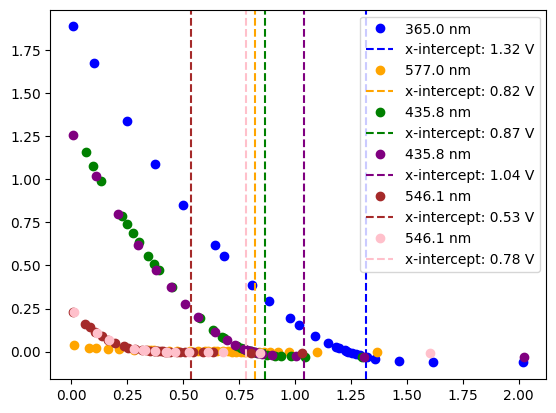

In [ ]:
# great now repeat the zero-point determination procedure for the other curves

dir = "/Users/charlottemyers/projects/jlab/photoelectric/data/"
files = [
         "365.0_trial1.csv",
         "577.0_trial1.csv",
         "435.8_trial1.csv",
         "435.8_trial2.csv",
         "546.1_trial1.csv",
         "546.1_trial2.csv",
         ]

colors = ['blue', 'orange', 'green', 'purple', 'brown', 'pink']
x_intercepts = []
wavelengths = [365.0, 577.0, 435.8, 435.8, 546.1, 546.1]
#wavelengths = [365.0, 435.8, 546.1]
for i, file in enumerate(files):
    df = pd.read_csv(dir + file, sep=",")
    V = df["V"].to_numpy()
    I = df["I"].to_numpy()
    coeffs = np.polyfit(V, I, 1)
    x_interp = -coeffs[1] / coeffs[0]
    x_intercepts.append(x_interp)
    plt.plot(V, I, marker="o", linestyle="none", color=colors[i], label=f"{wavelengths[i]} nm")
    plt.axvline(x=x_interp, color=colors[i], linestyle="--", label=f"x-intercept: {x_interp:.2f} V")

plt.legend()

Line fit: V = -1.4318297563285324e-43 * f + 2.971176876389265e-28


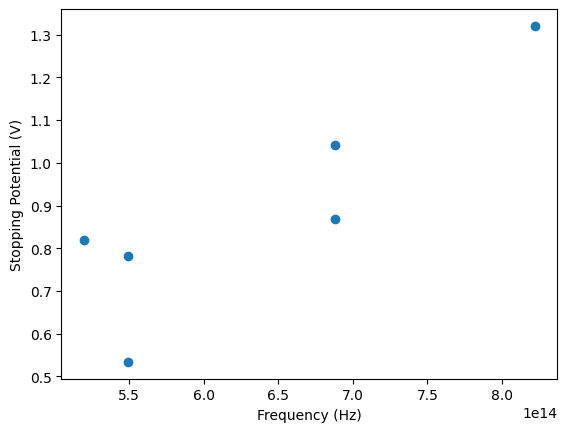

In [35]:
# 2nd order fit?
# Use tau test!!!!! for phil

# plot x-intercepts vs frequency
c = 3e8  # speed of light in m/s
frequencies = [c / (w * 1e-9) for w in wavelengths]  # convert nm to m
x_intercepts = np.array(x_intercepts)
plt.figure()
plt.plot(frequencies, x_intercepts, marker="o", linestyle="none")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Stopping Potential (V)")

# fit a line to the data
coeffs = np.polyfit(frequencies, x_intercepts, 3)
poly = np.poly1d(coeffs)
print(f"Line fit: V = {coeffs[0]} * f + {coeffs[1]}")
x_fit = np.linspace(min(frequencies), max(frequencies), 100)

In [36]:
# expected slope: h/e

h = 6.626e-34  # Planck's constant in J*s
e = 1.602e-19  # elementary charge in C
expected_slope = h / e
print(f"Expected slope (h/e): {expected_slope}")

Expected slope (h/e): 4.1360799001248435e-15


In [ ]:
# Two regimes - measure transition to plateau
# Need to account for the reverse current